In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from IPython.display import Image
import scipy.stats as stats

from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination

%matplotlib inline

In [2]:
data = pd.read_csv('../data/so.csv')

In [3]:
data = data[data.gender.isin(['Male', 'Female', 'Other'])]

In [4]:
data.gender.value_counts()

Male      51388
Female     3202
Other       274
Name: gender, dtype: int64

In [5]:
data.dogs_vs_cats.value_counts()

Dogs                      21852
Cats                      15508
Other (please specify)     7218
Name: dogs_vs_cats, dtype: int64

In [6]:
data.columns

Index([u'Unnamed: 0', u'collector', u'country', u'un_subregion', u'so_region',
       u'age_range', u'age_midpoint', u'gender', u'self_identification',
       u'occupation', u'occupation_group', u'experience_range',
       u'experience_midpoint', u'salary_range', u'salary_midpoint',
       u'big_mac_index', u'tech_do', u'tech_want', u'aliens',
       u'programming_ability', u'employment_status', u'industry',
       u'company_size_range', u'team_size_range', u'women_on_team', u'remote',
       u'job_satisfaction', u'job_discovery', u'dev_environment',
       u'commit_frequency', u'hobby', u'dogs_vs_cats', u'desktop_os',
       u'unit_testing', u'rep_range', u'visit_frequency',
       u'why_learn_new_tech', u'education', u'open_to_new_job',
       u'new_job_value', u'job_search_annoyance', u'interview_likelihood',
       u'how_to_improve_interview_process', u'star_wars_vs_star_trek',
       u'agree_tech', u'agree_notice', u'agree_problemsolving',
       u'agree_diversity', u'agree_adbloc

In [7]:
def df_to_cpd(df, target_var, parents=[],):
    variable_cardinality = df[target_var].nunique()
    if len(parents) == 0:
        values = [df[target_var].value_counts(normalize=True).values]
    else:
        df = df.dropna(subset=[target_var]+parents)
        evidence_card = [df[c].nunique() for c in parents]
        evidence = 1 #todo

In [8]:
model = BayesianModel([('gender', 'dogs_vs_cats'), ('age_midpoint', 'dogs_vs_cats')])
model.fit(data, estimator_type=MaximumLikelihoodEstimator, complete_samples_only=False)
infer = VariableElimination(model)
df = data

def ev(dictionary):
    return {k: list(df[k].unique()).index(v) for k,v in dictionary.items()}


In [9]:
print(infer.query(['dogs_vs_cats'], evidence=ev({'gender':'Male'}))['dogs_vs_cats'])

+----------------+---------------------+
| dogs_vs_cats   |   phi(dogs_vs_cats) |
|----------------+---------------------|
| dogs_vs_cats_0 |              0.3924 |
| dogs_vs_cats_1 |              0.4143 |
| dogs_vs_cats_2 |              0.1933 |
+----------------+---------------------+


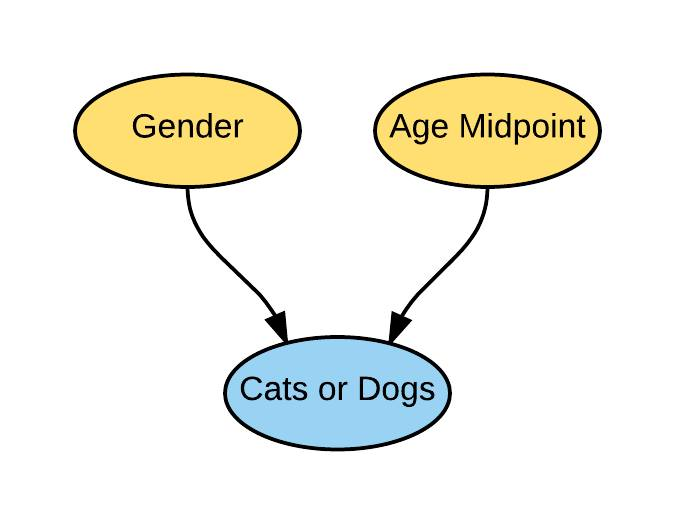

In [10]:
Image('../figures/catdog.png')

In [11]:
df_ = df.dropna(subset=['salary_range'])
df_ = df_[df_['salary_range'].str.contains('\$')]
df_['desktop_os'] = df_['desktop_os'].str.replace('Ubuntu|Debian|Fedora|Mint|Other Linux', 'Linux')
df_['desktop_os'] = df_['desktop_os'].str.replace('Windows.*', 'Windows')
df_['is_javascript'] = df_['tech_do'].str.contains('JavaScript').apply(lambda x: str(x) if not x == np.nan else np.nan)
df_['is_php'] = df_['tech_do'].str.contains('PHP').apply(lambda x: str(x) if not x == np.nan else np.nan)
df_['is_python'] = df_['tech_do'].str.contains('Python').apply(lambda x: str(x) if not x == np.nan else np.nan)
df_['salary_range'] = df_.salary_range.str.replace('\$[0-9]{3},000 - \$[0-9]{3},000', 'More than $100,000')
df_['salary_range'] = df_.salary_range.str.replace('More than \$200,000', 'More than $100,000')

In [34]:
model = BayesianModel([('age_range', 'star_wars_vs_star_trek'), 
                       ('age_range', 'experience_range'),
                       ('experience_range', 'salary_range'),
                       ('gender', 'salary_range'),
                       ('so_region', 'salary_range'),
                       ('gender', 'agree_diversity'),
                       ('agree_diversity', 'is_javascript'),
                       ('agree_diversity', 'is_php'),
                       ('agree_diversity', 'is_python'),
                       ('so_region', 'desktop_os'),
                       ('desktop_os', 'is_javascript'),
                       ('desktop_os', 'is_php'),
                       ('desktop_os', 'is_python'),
                       ('is_javascript', 'salary_range'),
                       ('is_php', 'salary_range'),
                       ('is_python', 'salary_range'),
                       ('age_range', 'desktop_os'),
                       ('so_region', 'agree_diversity'),])
model.fit(df_, estimator_type=MaximumLikelihoodEstimator, complete_samples_only=False)

In [13]:
with open('cpds.txt', 'w') as out:
    for cpd in model.get_cpds():
        out.write(str(cpd) + '\n')

In [14]:
df_['salary_range']

1         $40,000 - $50,000
3         Less than $10,000
6        More than $100,000
7         Less than $10,000
9         Less than $10,000
11        $10,000 - $20,000
12        Less than $10,000
13        Less than $10,000
14        $10,000 - $20,000
19        $10,000 - $20,000
20       $90,000 - $100,000
21        Less than $10,000
23        Less than $10,000
26        $40,000 - $50,000
28        $30,000 - $40,000
32        $10,000 - $20,000
33        $30,000 - $40,000
34        $10,000 - $20,000
35        Less than $10,000
36        $10,000 - $20,000
37        $20,000 - $30,000
38        $10,000 - $20,000
39        $10,000 - $20,000
40        $10,000 - $20,000
41        Less than $10,000
42        $70,000 - $80,000
45       $90,000 - $100,000
46        $20,000 - $30,000
47       More than $100,000
48        $30,000 - $40,000
                ...        
55987    More than $100,000
55988    More than $100,000
55989     $80,000 - $90,000
55990    More than $100,000
55991    More than $

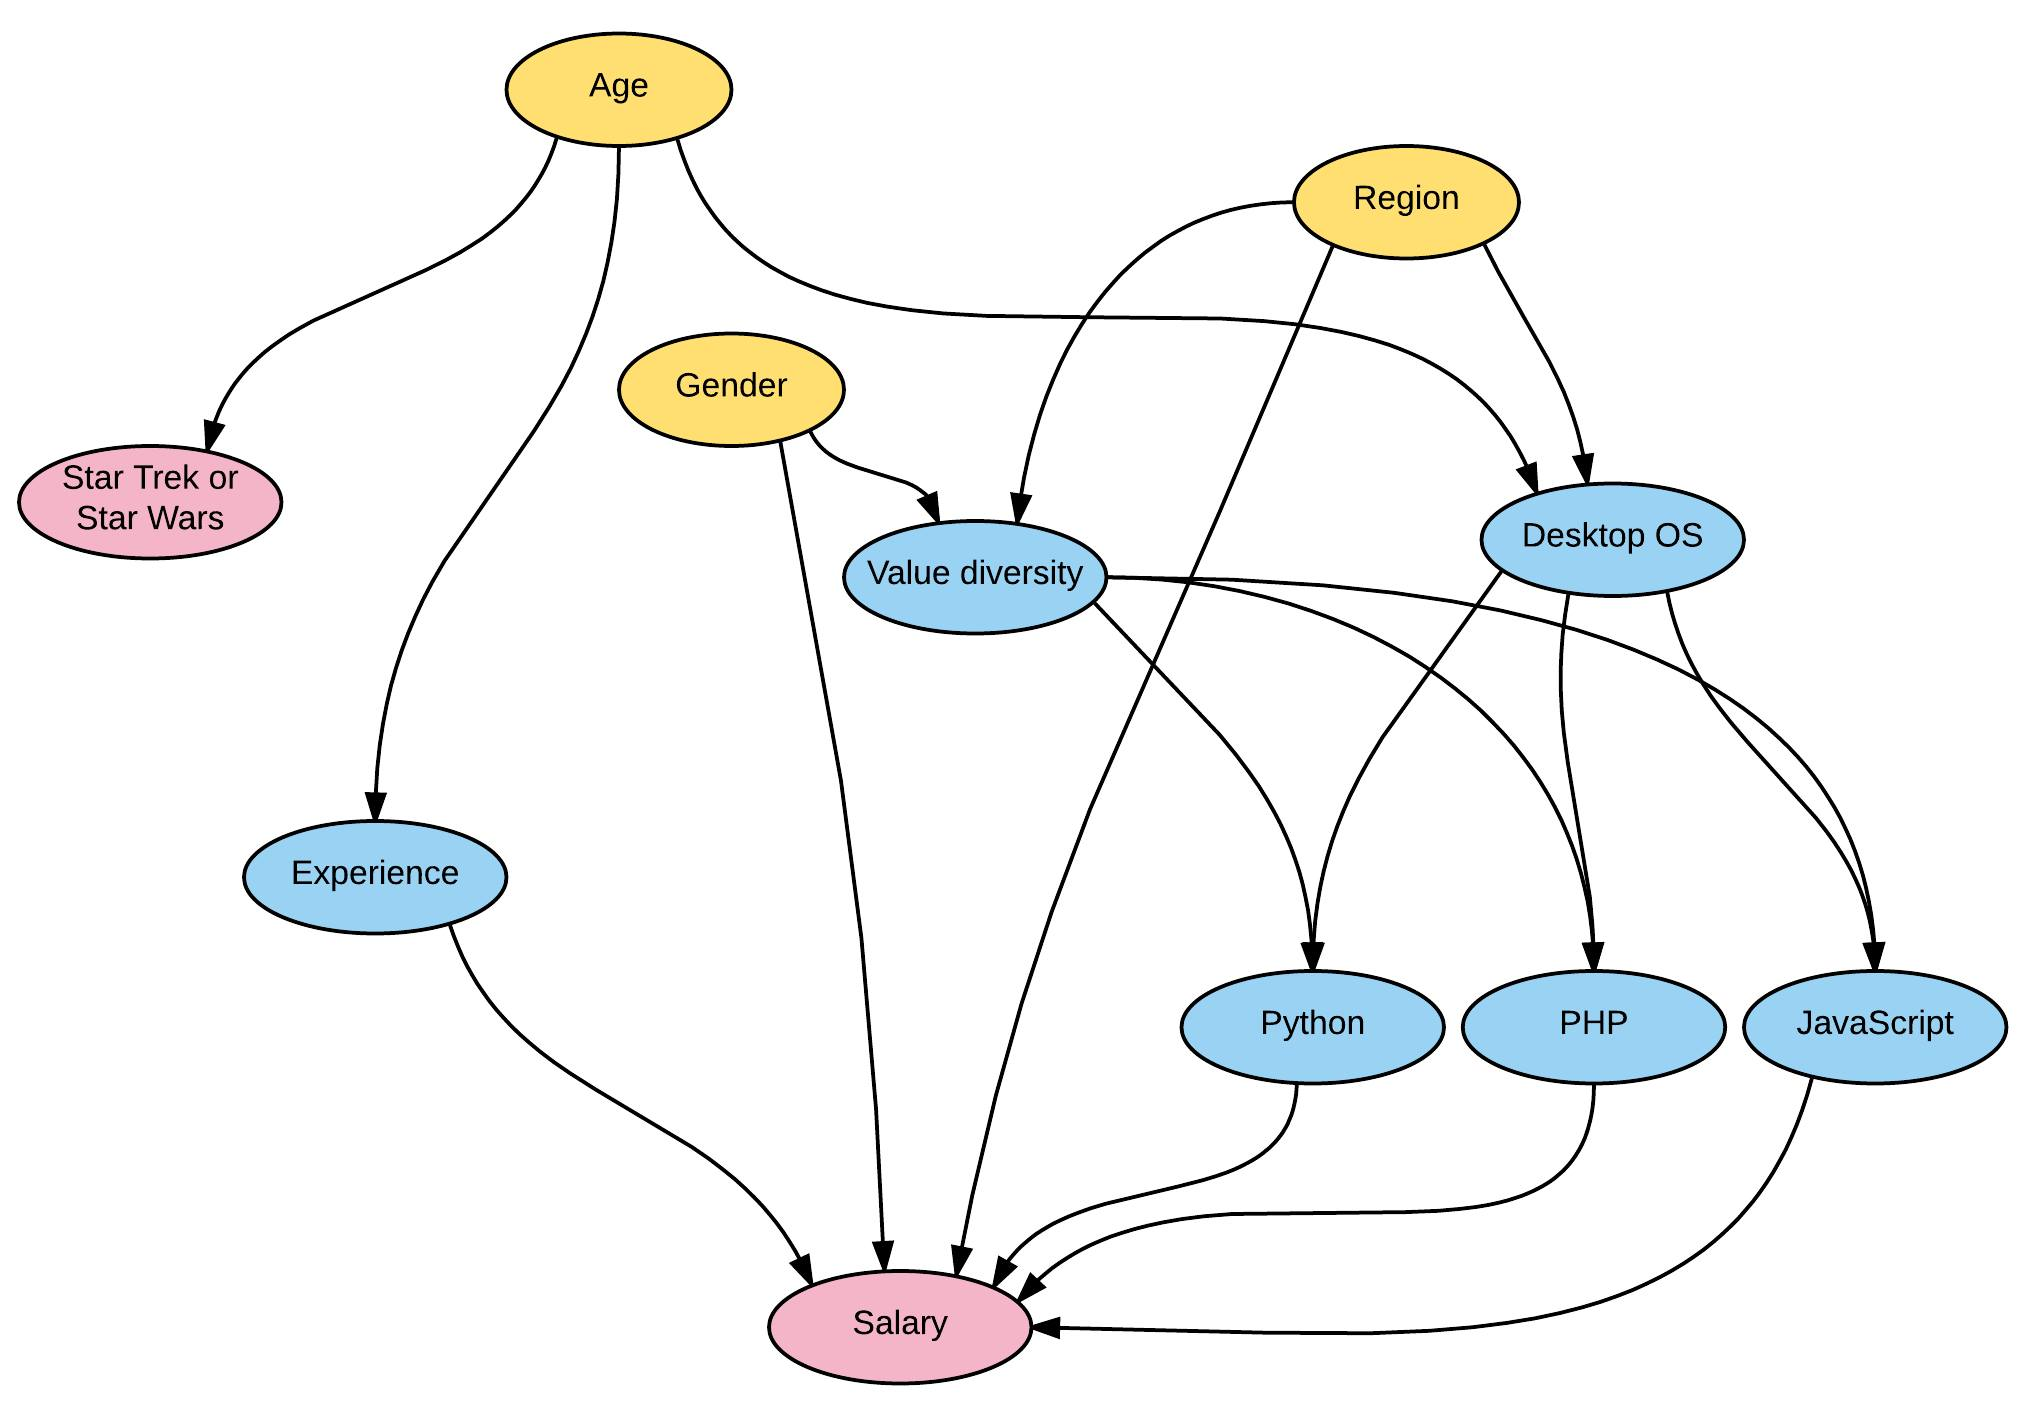

In [15]:
Image('../figures/network1.png')

In [16]:
data = df_[['age_range', 'star_wars_vs_star_trek', 'experience_range', 
            'salary_range', 'gender', 'so_region', 'agree_diversity',
            'is_javascript', 'is_php', 'is_python', 'desktop_os', 'age_midpoint', 
            'salary_midpoint', 'experience_midpoint']]

In [17]:
likert = ['Disagree completely', 'Disagree somewhat', 'Neutral', 'Agree somewhat', 'Agree completely']
data['agree_diversity'] = data['agree_diversity'].apply(lambda x: likert.index(x) + 1 if x in likert else np.nan)
print(data['agree_diversity'].head())

1    4.0
3    4.0
6    NaN
7    1.0
9    4.0
Name: agree_diversity, dtype: float64


C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [18]:
sb.set(font_scale=1.5)
def correlation(data, x, y, xname, yname):
    d = data.dropna(subset=[x, y])
    print('correlation {} with {}'.format(x, y))
    print('r=%.2f, p=%.20f' % stats.pearsonr(d[x], d[y]))
    plt.figure(figsize=(10, 10))
    
    
    font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
    
    ax = sb.violinplot(d[x], d[y], xlabel=xname)
    ax.set(xlabel=xname, ylabel=yname)
    
    plt.show()

correlation age_midpoint with experience_midpoint
r=0.68, p=0.00000000000000000000


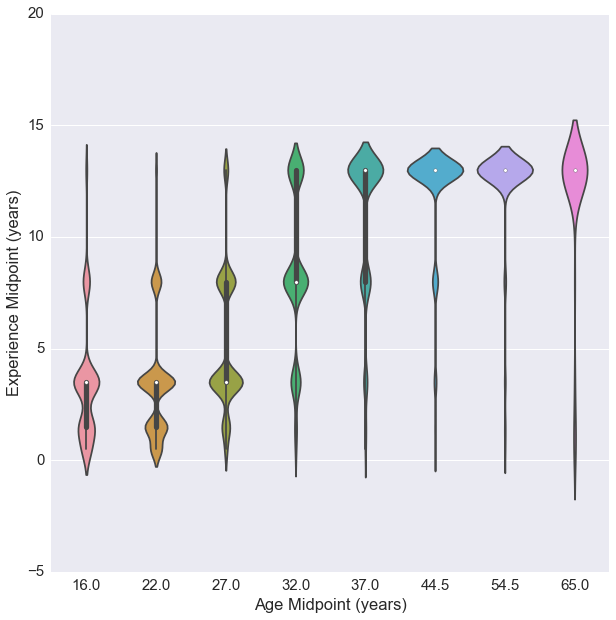

correlation experience_midpoint with salary_midpoint
r=0.49, p=0.00000000000000000000


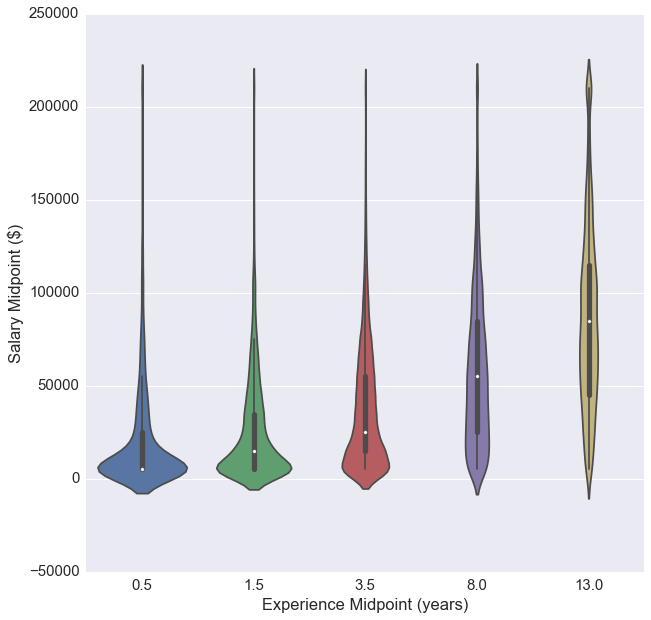

In [19]:
correlation(data, 'age_midpoint', 'experience_midpoint', 'Age Midpoint (years)', 'Experience Midpoint (years)')
correlation(data, 'experience_midpoint', 'salary_midpoint', 'Experience Midpoint (years)', 'Salary Midpoint ($)')

In [20]:
def test_median(data, x, y, normal=True, plots=False):
    d = data.dropna(subset=[x, y])
    groups = [d[y][d[x] == u] for u in d[x].unique()]
    if plots:
        for group in groups:
            plt.figure()
            plt.hist(group)
            plt.show()
    if normal:
        F, p = stats.f_oneway(*groups)
    else:
        F, p = stats.kruskal(*groups)
    print("{} with {}".format(x, y))
    print('p=%.4f' % p)

In [21]:
test_median(data, 'so_region', 'agree_diversity', normal=False)

so_region with agree_diversity
p=0.0000


In [22]:
test_median(data, 'so_region', 'age_midpoint')

so_region with age_midpoint
p=0.0000


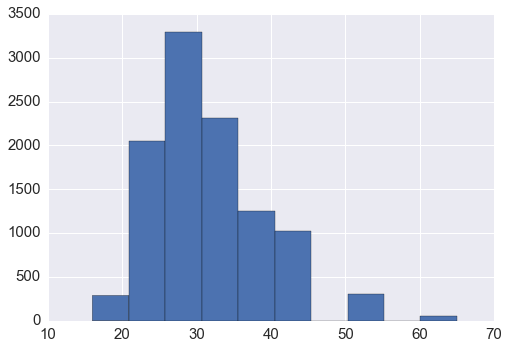

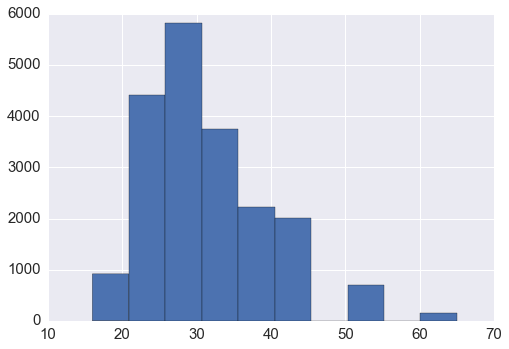

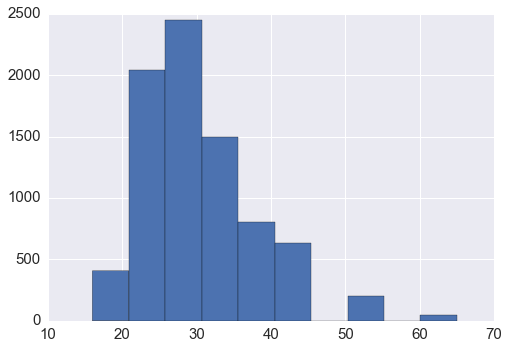

desktop_os with age_midpoint
p=0.0000


In [23]:
test_median(data, 'desktop_os', 'age_midpoint', plots=True)

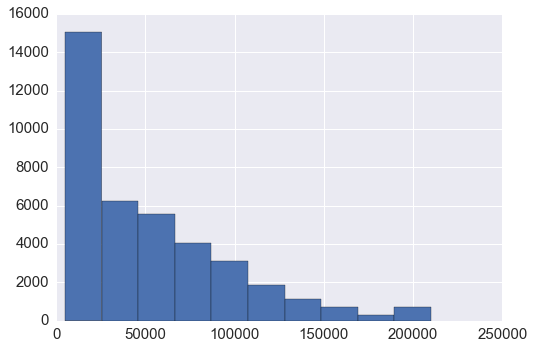

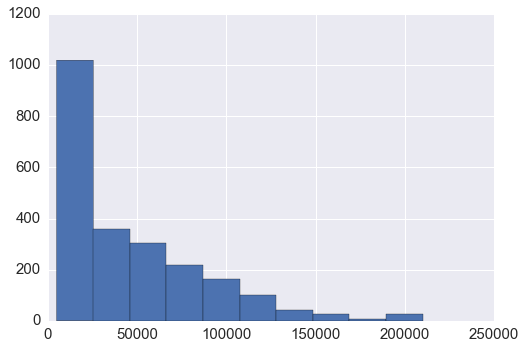

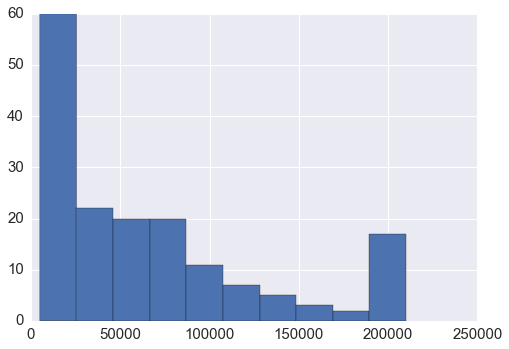

gender with salary_midpoint
p=0.0000


In [24]:
test_median(data, 'gender', 'salary_midpoint', normal=False, plots=True)

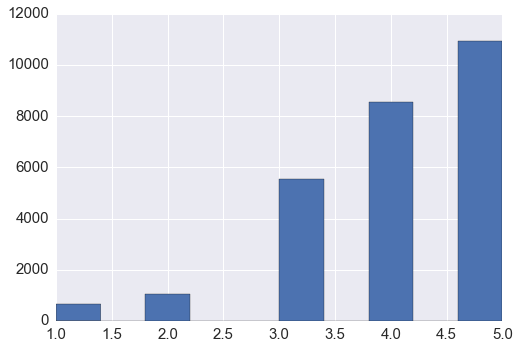

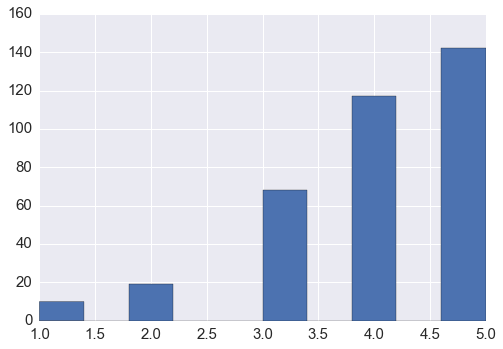

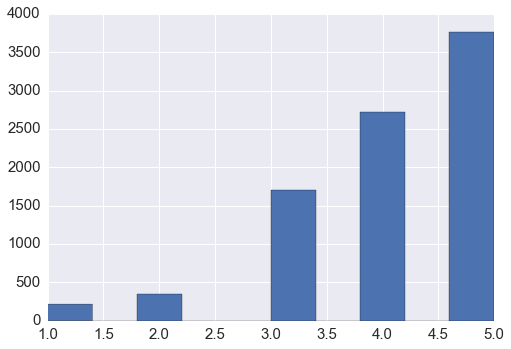

is_python with agree_diversity
p=0.0101


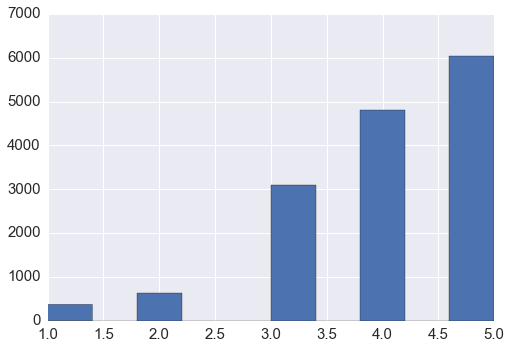

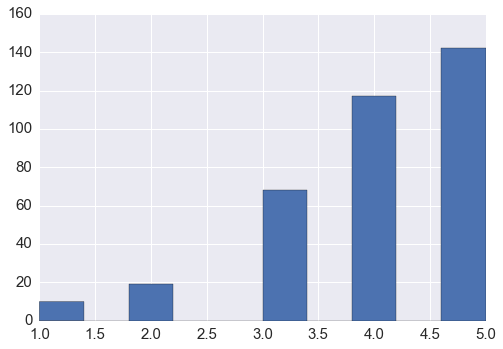

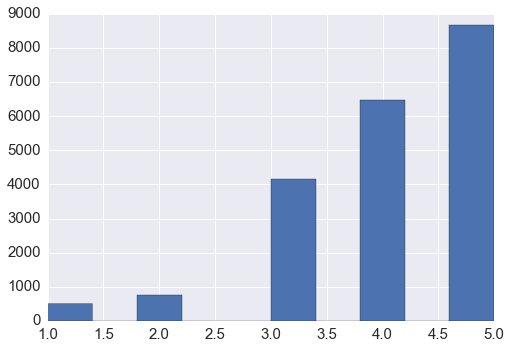

is_javascript with agree_diversity
p=0.0033


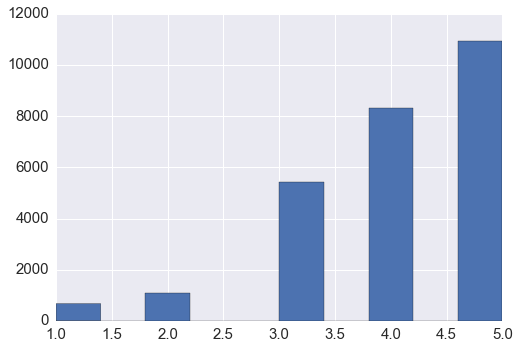

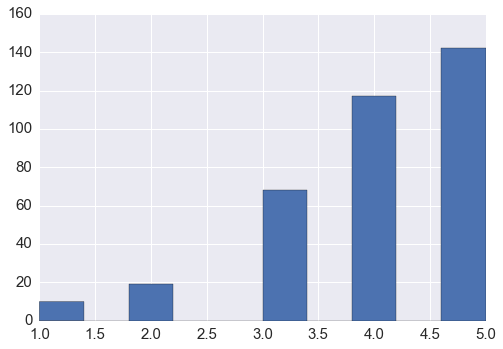

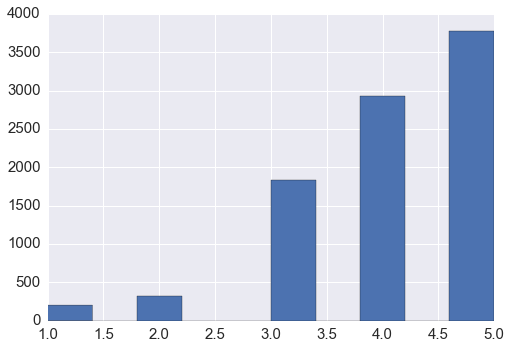

is_php with agree_diversity
p=0.2616


In [25]:
test_median(data, 'is_python', 'agree_diversity', normal=False, plots=True)
test_median(data, 'is_javascript', 'agree_diversity', normal=False, plots=True)
test_median(data, 'is_php', 'agree_diversity', normal=False, plots=True)

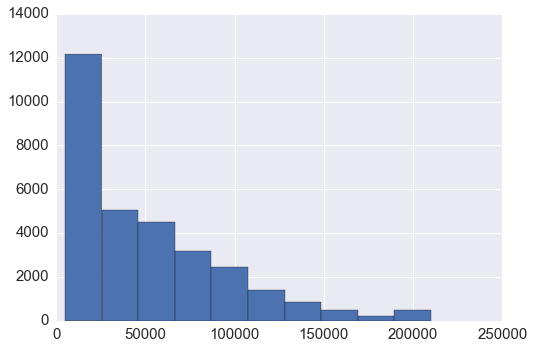

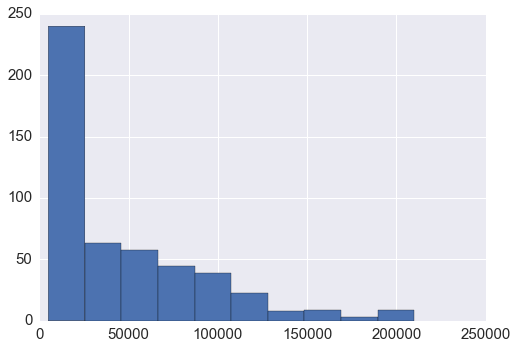

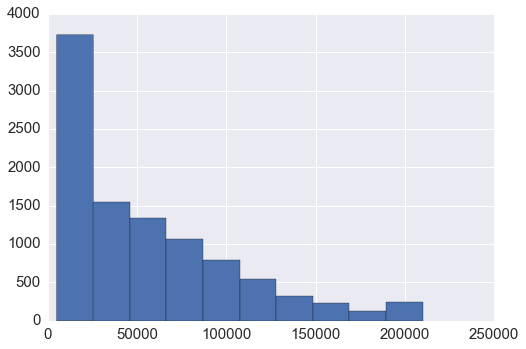

is_python with salary_midpoint
p=0.0000


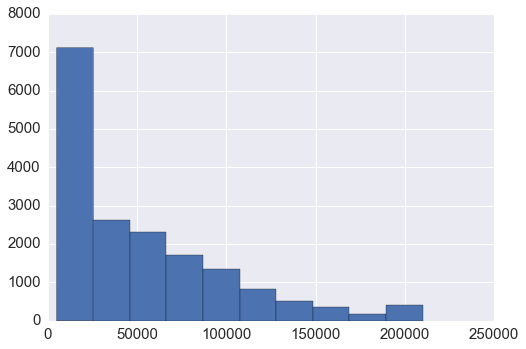

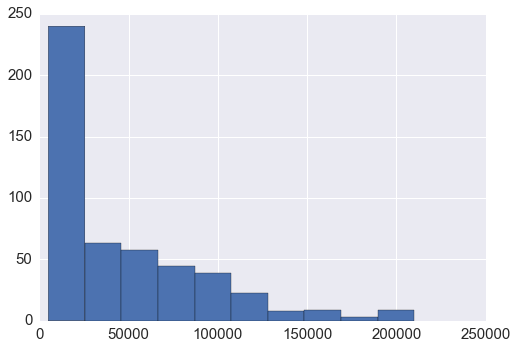

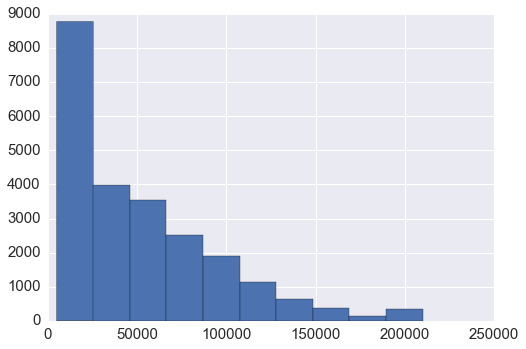

is_javascript with salary_midpoint
p=0.0000


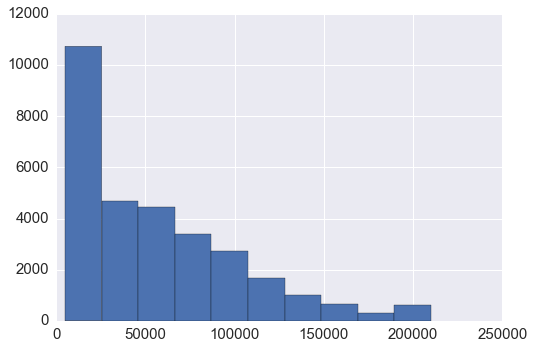

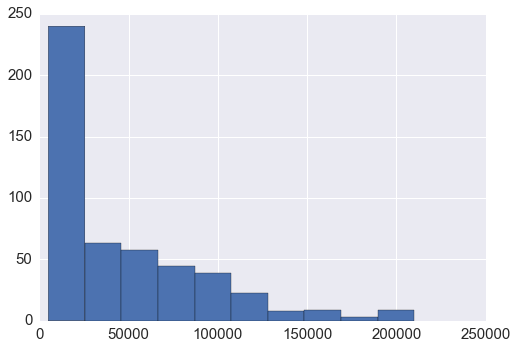

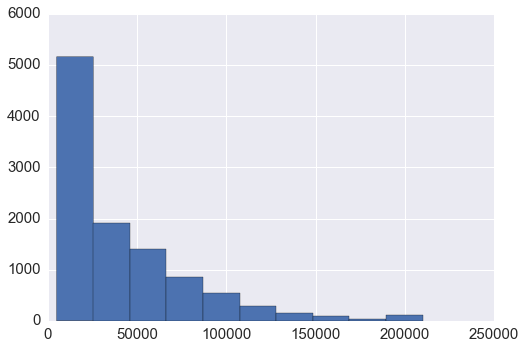

is_php with salary_midpoint
p=0.0000


In [26]:
test_median(data, 'is_python', 'salary_midpoint', normal=False, plots=True)
test_median(data, 'is_javascript', 'salary_midpoint', normal=False, plots=True)
test_median(data, 'is_php', 'salary_midpoint', normal=False, plots=True)

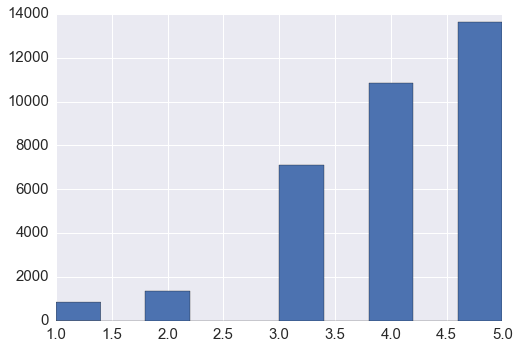

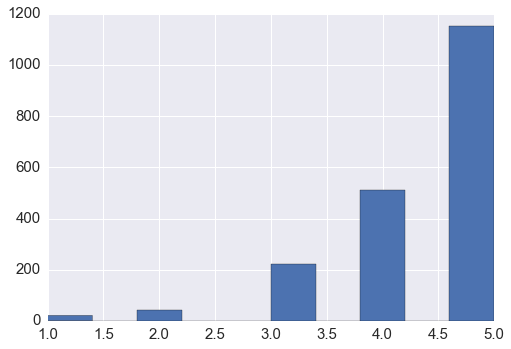

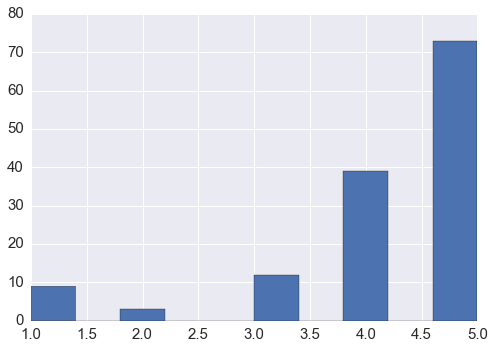

gender with agree_diversity
p=0.0000


In [27]:
test_median(data, 'gender', 'agree_diversity', normal=False, plots=True)

In [28]:
def chisquare(data, x, y):
    d = data.dropna(subset=[x, y])
    population_counts = d[y].value_counts()
    for value in d[x].unique():
        subgroup_counts = d[y][d[x] == value].value_counts()
        # Make sure all possible values are represented                
        for possible_value in population_counts.index:
            if possible_value not in subgroup_counts:
                subgroup_counts[possible_value] = 0
        chisq, p = stats.chisquare(subgroup_counts, population_counts)
        print(subgroup_counts / subgroup_counts.sum())
        print('{}={}: p={}'.format(x, value, p))

In [29]:
chisquare(data, 'is_python', 'desktop_os')
chisquare(data, 'is_javascript', 'desktop_os')
chisquare(data, 'is_php', 'desktop_os')
print(data['desktop_os'].value_counts(normalize=True))

Windows     0.571399
Mac OS X    0.267413
Linux       0.161188
Name: desktop_os, dtype: float64
is_python=False: p=0.0
Windows     0.657005
Linux       0.176329
Mac OS X    0.166667
Name: desktop_os, dtype: float64
is_python=nan: p=0.0
Linux       0.359141
Windows     0.342976
Mac OS X    0.297884
Name: desktop_os, dtype: float64
is_python=True: p=0.0
Windows     0.507911
Mac OS X    0.255002
Linux       0.237087
Name: desktop_os, dtype: float64
is_javascript=False: p=0.0
Windows     0.657005
Linux       0.176329
Mac OS X    0.166667
Name: desktop_os, dtype: float64
is_javascript=nan: p=0.0
Windows     0.520847
Mac OS X    0.289511
Linux       0.189642
Name: desktop_os, dtype: float64
is_javascript=True: p=0.0
Windows     0.532785
Mac OS X    0.268256
Linux       0.198959
Name: desktop_os, dtype: float64
is_php=False: p=0.0
Windows     0.657005
Linux       0.176329
Mac OS X    0.166667
Name: desktop_os, dtype: float64
is_php=nan: p=0.0
Windows     0.465264
Mac OS X    0.293963
Linux   

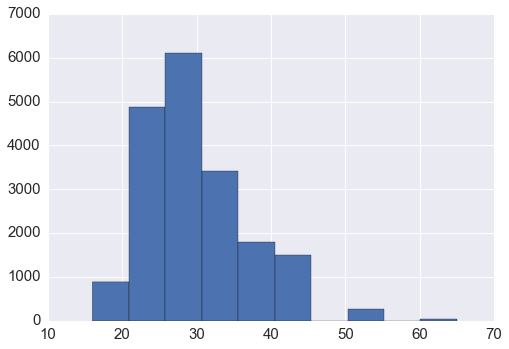

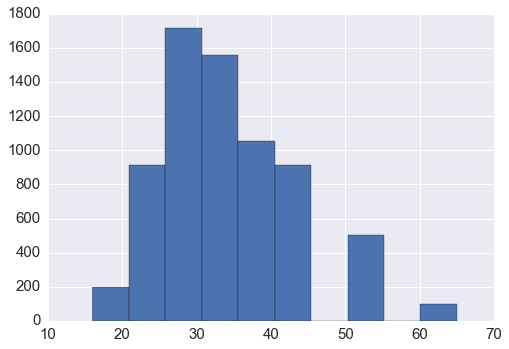

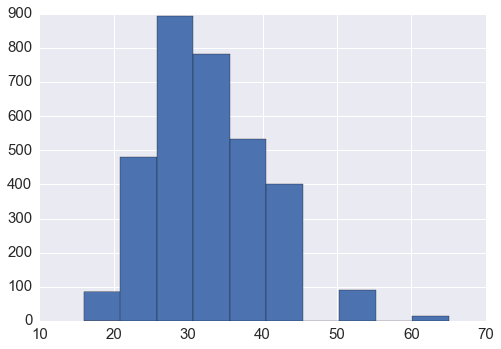

star_wars_vs_star_trek with age_midpoint
p=0.0000


In [30]:
test_median(data, 'star_wars_vs_star_trek', 'age_midpoint', plots=True)

In [32]:
chisquare(data, 'desktop_os', 'so_region')
print(data.so_region.value_counts(normalize=True))

North America      0.386672
Western Europe     0.346289
Eastern Europe     0.088918
South Asia         0.044270
South America      0.030524
Oceania            0.028818
Middle East        0.018770
East Asia          0.016874
Southeast Asia     0.012987
Central America    0.011849
Africa             0.010238
Caribbean          0.002086
Central Asia       0.001706
Name: so_region, dtype: float64
desktop_os=Mac OS X: p=0.0
Western Europe     0.362409
North America      0.230826
Eastern Europe     0.153141
South Asia         0.102094
South America      0.049436
Middle East        0.023045
Oceania            0.022922
Africa             0.016727
Southeast Asia     0.013010
East Asia          0.010779
Central America    0.010655
Caribbean          0.002850
Central Asia       0.002106
Name: so_region, dtype: float64
desktop_os=Linux: p=0.0
Western Europe     0.335961
North America      0.292428
Eastern Europe     0.130699
South Asia         0.085409
South America      0.032135
Middle East      

In [35]:
infer = VariableElimination(model)
print(infer.query(['so_region']) ['so_region'])

+--------------+------------------+
| so_region    |   phi(so_region) |
|--------------+------------------|
| so_region_0  |           0.0158 |
| so_region_1  |           0.0029 |
| so_region_2  |           0.0105 |
| so_region_3  |           0.0021 |
| so_region_4  |           0.0135 |
| so_region_5  |           0.1259 |
| so_region_6  |           0.0271 |
| so_region_7  |           0.2996 |
| so_region_8  |           0.0277 |
| so_region_9  |           0.0354 |
| so_region_10 |           0.0816 |
| so_region_11 |           0.0165 |
| so_region_12 |           0.3414 |
+--------------+------------------+


In [47]:
s = infer.query(['salary_range', 'age_range']) ['age_range']

In [58]:
def print_query(discrete_factor):
    var_name = discrete_factor.variables[0]
    state_names = map(str, sorted(data[var_name].dropna().unique()))
    l = max(map(len, state_names))
    
    for name, prob in zip(state_names, discrete_factor.values):
        print(name.ljust(l) +' | '+ str(prob))

def ev(dictionary):
    return {k: sorted(list(data[k].dropna().unique())).index(v) for k,v in dictionary.items()}
        
print_query(s)



20-24                  | 0.222742718447
25-29                  | 0.300388349515
30-34                  | 0.193567961165
35-39                  | 0.108834951456
40-49                  | 0.0929854368932
50-59                  | 0.0305582524272
< 20                   | 0.0424514563107
> 60                   | 0.00652912621359
Prefer not to disclose | 0.00194174757282


In [38]:
data.age_range.value_counts(normalize=True)

25-29                     0.300388
20-24                     0.222743
30-34                     0.193568
35-39                     0.108835
40-49                     0.092985
< 20                      0.042451
50-59                     0.030558
> 60                      0.006529
Prefer not to disclose    0.001942
Name: age_range, dtype: float64

In [39]:
data.is_php.value_counts()

False    30174
True     10562
nan        497
Name: is_php, dtype: int64

In [40]:
s = infer.query(['age_range'], evidence=ev({'star_wars_vs_star_trek':'Star Trek'}))
print_query(s['age_range'])

20-24                  | 0.152455717936
25-29                  | 0.276432209501
30-34                  | 0.235171718487
35-39                  | 0.153967299758
40-49                  | 0.118918439892
50-59                  | 0.0282525028719
< 20                   | 0.0276723607515
> 60                   | 0.00548751275998
Prefer not to disclose | 0.00164223804278


In [41]:
s = infer.query(['age_range'], evidence=ev({'star_wars_vs_star_trek':'Star Wars'}))
print_query(s['age_range'])

20-24                  | 0.136000601464
25-29                  | 0.249177201895
30-34                  | 0.219905919219
35-39                  | 0.142812230594
40-49                  | 0.126818786636
50-59                  | 0.0753410530277
< 20                   | 0.030082072888
> 60                   | 0.0164728887384
Prefer not to disclose | 0.00338924553781


In [42]:
s = infer.query(['salary_range'], evidence=ev({'star_wars_vs_star_trek':'Star Wars'}))
print_query(s['salary_range'])

$10,000 - $20,000  | 0.106782729214
$20,000 - $30,000  | 0.094915312771
$30,000 - $40,000  | 0.0904618186365
$40,000 - $50,000  | 0.0871332365757
$50,000 - $60,000  | 0.0822468842882
$60,000 - $70,000  | 0.0739764122344
$70,000 - $80,000  | 0.0642469490693
$80,000 - $90,000  | 0.0484294046873
$90,000 - $100,000 | 0.0452831056178
Less than $10,000  | 0.138748168834
More than $100,000 | 0.167775978071


In [43]:
s = infer.query(['salary_range'], evidence=ev({'star_wars_vs_star_trek':'Star Trek'}))
print_query(s['salary_range'])

$10,000 - $20,000  | 0.110614164622
$20,000 - $30,000  | 0.0961547875284
$30,000 - $40,000  | 0.0914049751042
$40,000 - $50,000  | 0.0875254492445
$50,000 - $60,000  | 0.0824411579529
$60,000 - $70,000  | 0.0735733614936
$70,000 - $80,000  | 0.063568597726
$80,000 - $90,000  | 0.0473685474697
$90,000 - $100,000 | 0.0438027865114
Less than $10,000  | 0.145666962002
More than $100,000 | 0.157879210345


In [52]:
print_query(infer.query(['salary_range'], evidence=ev({'gender':'Male', 'so_region':'Western Europe', 'is_javascript':'True', 'is_php':'False','is_python':'True'}))['salary_range'])

$10,000 - $20,000  | 0.0580077794087
$20,000 - $30,000  | 0.105276871914
$30,000 - $40,000  | 0.117410637926
$40,000 - $50,000  | 0.132720756924
$50,000 - $60,000  | 0.120603969786
$60,000 - $70,000  | 0.0827502615159
$70,000 - $80,000  | 0.0710722695623
$80,000 - $90,000  | 0.0440019359798
$90,000 - $100,000 | 0.0261495892382
Less than $10,000  | 0.145219118617
More than $100,000 | 0.0967868091271


In [59]:
print_query(infer.query(['agree_diversity'], evidence=ev({'gender':'Male', 'so_region':'Western Europe', 'is_javascript':'True', 'is_php':'False','is_python':'True'}))['agree_diversity'])

1.0 | 0.427868580784
2.0 | 0.337211263115
3.0 | 0.0200549739271
4.0 | 0.0333188220049
5.0 | 0.181546360169


In [62]:
print_query(infer.query(['desktop_os'], evidence=ev({'gender':'Male', 'so_region':'Africa', 'is_javascript':'True', 'is_php':'True','is_python':'True'}))['desktop_os'])

Linux    | 0.40266442476
Mac OS X | 0.21986497308
Windows  | 0.37747060216
